In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from time import time
from sklearn.manifold import TSNE
from matplotlib import offsetbox
from sklearn import (manifold, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))

In [187]:
data = pd.read_csv('final_data_2.csv')
len(data)

356

In [188]:
fav = scaler.fit_transform(list(data.Fav))
rt = scaler.fit_transform(list(data.RT))
tweets = scaler.fit_transform(list(data.Tweets))
PI = []
for i in range(len(tweets)):
    PI.append((fav[i]*rt[i]*tweets[i])**(1./3.))
data['PI'] = PI

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea

In [173]:
data.head()

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets,Dates,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events,PI
0,1.048383,24.457235,287660.0,164738.0,258.0,45.0,4361.0,20160911.0,-0.547192,4.304310,894.0,119.0,808.0,116.0,0.207926
1,1.930897,24.494482,4532694.0,3086731.0,2942.0,739.0,36062.0,20160912.0,-1.960844,3.279487,726.0,124.0,724.0,117.0,3.017024
2,1.619007,25.076207,4915644.0,3052886.0,4295.0,1334.0,48867.0,20160913.0,-0.668595,2.845806,1143.0,163.0,1059.0,155.0,3.419698
3,0.845102,25.037506,2883815.0,2056129.0,2612.0,525.0,31808.0,20160914.0,0.126425,2.770803,1098.0,192.0,1066.0,137.0,2.168573
4,1.741547,24.959742,1670461.0,1061135.0,1612.0,448.0,20170.0,20160915.0,-0.974327,2.219672,711.0,135.0,707.0,122.0,1.238513


In [227]:
columns = ['PI', 'PosWords', 'NegWords', 
          'NumMentions', 'NumSources', 'NumArticles',]
X = data[columns].as_matrix()
y = np.array(data.Dates)
n_samples, n_features = X.shape
n_neighbors = 10
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(356, 2)

In [228]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(18,8))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 10})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title, fontsize=15)
    plt.show()

Computing random projection


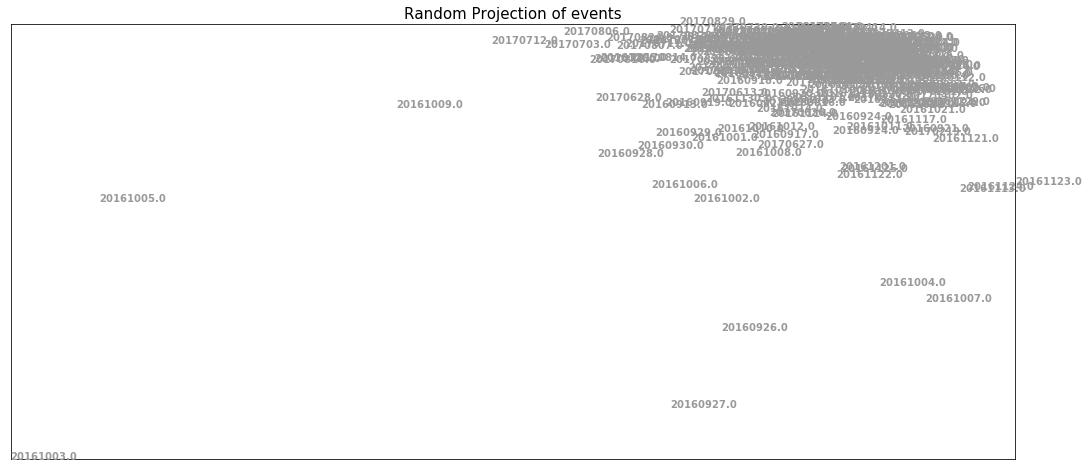

In [229]:
#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of events")

Computing PCA projection


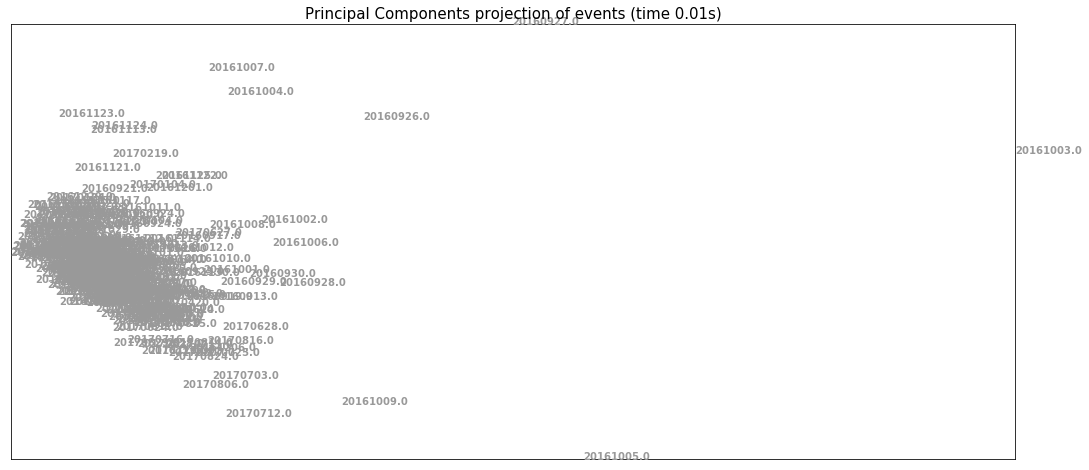

In [230]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of events (time %.2fs)" %
               (time() - t0))

Computing Isomap embedding
Done.


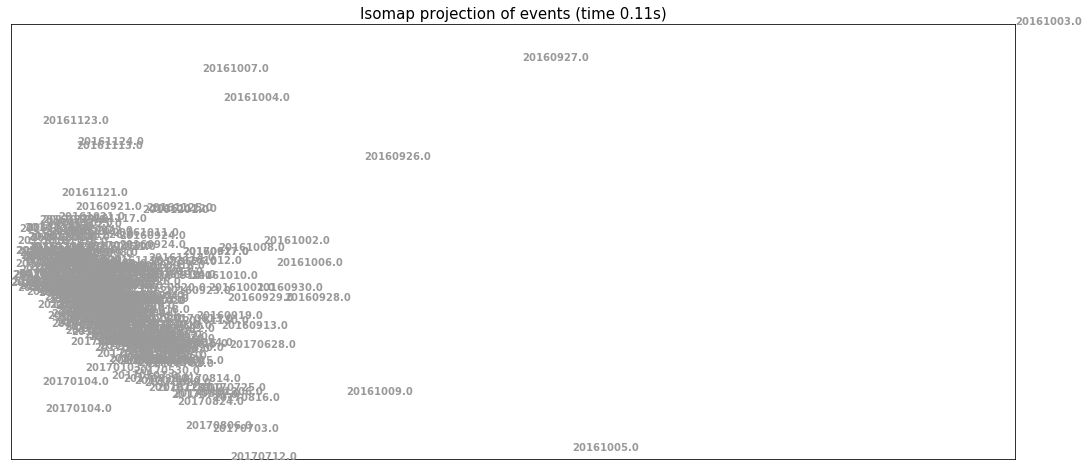

In [231]:
#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of events (time %.2fs)" %
               (time() - t0))

Computing LLE embedding
Done. Reconstruction error: 1.85706e-06


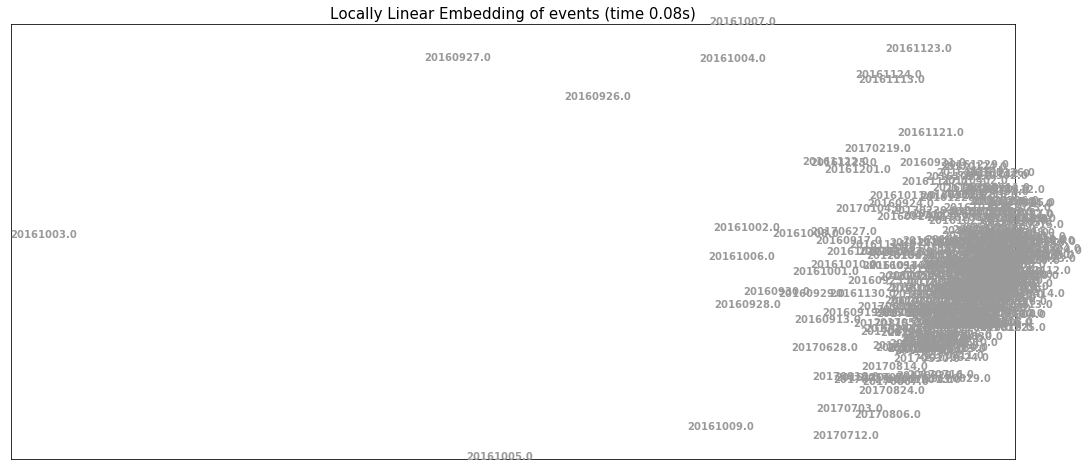

In [232]:
#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of events (time %.2fs)" %
               (time() - t0))

Computing MDS embedding
Done. Stress: 1157748081.558410


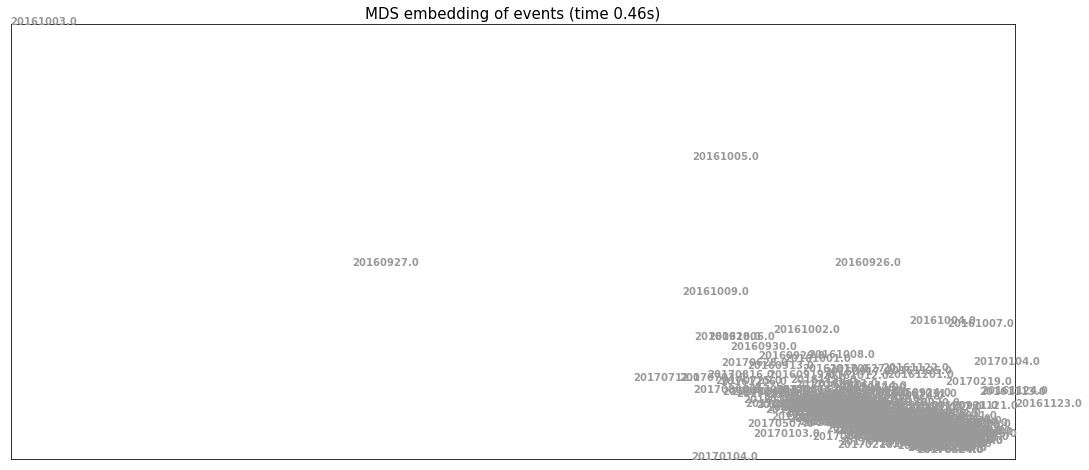

In [219]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of events (time %.2fs)" %
               (time() - t0))

Computing Totally Random Trees embedding


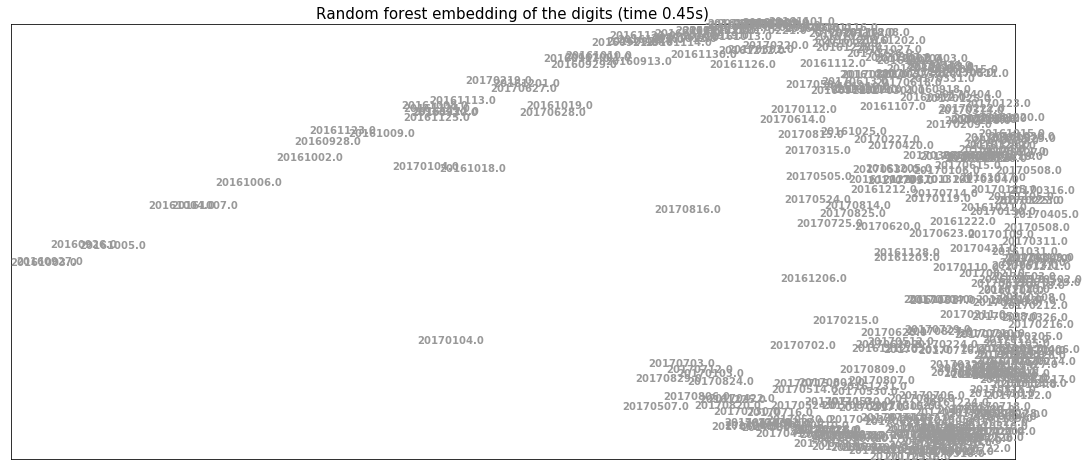

In [220]:
#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing Spectral embedding


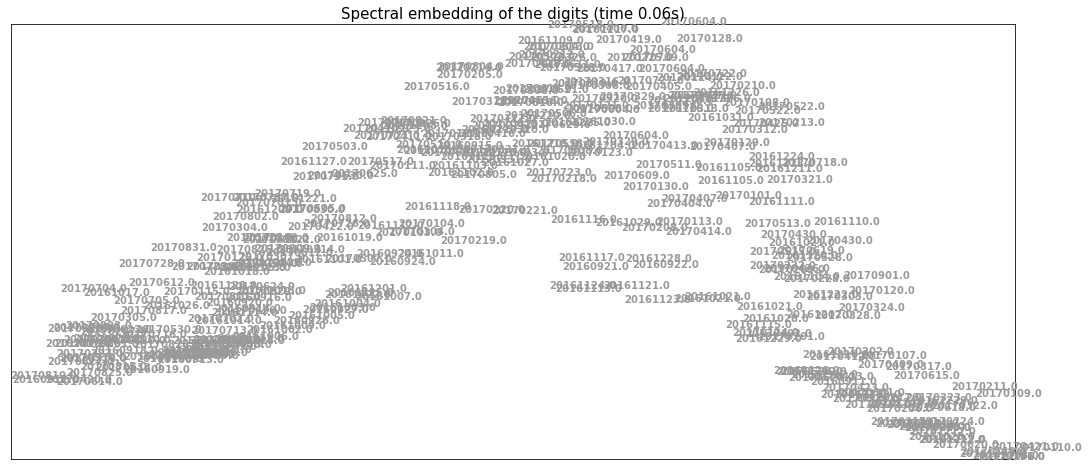

In [221]:
#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing t-SNE embedding


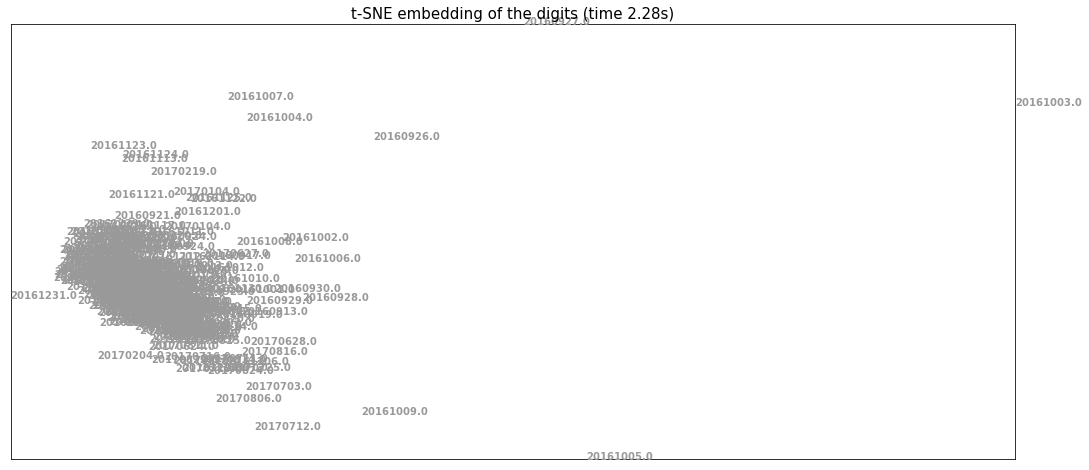

In [222]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))